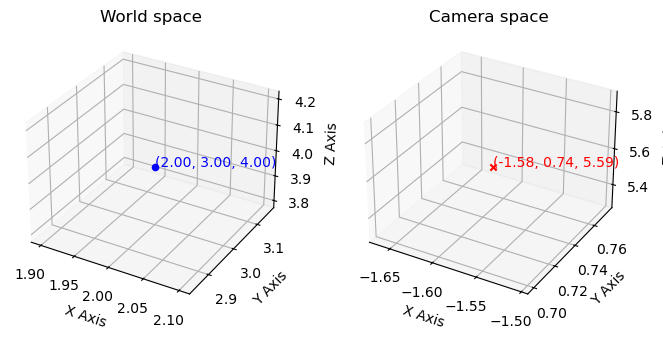

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# In the beginning, the camera's local coordinate system coincides with the world coordinate system.
initial_camera_transformation = np.identity(4, dtype=np.float32)

# First rotate the camera around the z axis by 130 degrees, then move it by a translation of (dx, dy, dz) = (2.0, 3.0, 1.0), finally rotate it around the x axis by 20 degrees.
# TODO: compute the 4 x 4 matrix corresponding to each transformation described above and composite them into a single transformation matrix, i.e., the camera transformation matrix.

# a rotation of 130 degrees around the z axis
rotation1 = None
theta_z = 130 * np.pi / 180.0
rotation1 = np.array([
        [np.cos(theta_z), -np.sin(theta_z), 0, 0],
        [np.sin(theta_z), np.cos(theta_z), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ], dtype=np.float32)

# a translation of (dx, dy, dz) = (2.0, 3.0, 1.0)
translation = None
dx = 2.0
dy = 3.0
dz = 1.0
translation = np.array([
        [1, 0, 0, dx],
        [0, 1, 0, dy],
        [0, 0, 1, dz],
        [0, 0, 0, 1]
    ], dtype=np.float32)

#  a rotation of 20 degrees around the x axis
rotation2 = None
theta_x = 20 * np.pi / 180.0
rotation2 = np.array([
        [1, 0, 0, 0],
        [0, np.cos(theta_x), -np.sin(theta_x), 0],
        [0, np.sin(theta_x), np.cos(theta_x), 0],
        [0, 0, 0, 1]
    ], dtype=np.float32)


current_camera_transformation = None
current_camera_transformation = rotation2 @ translation @ rotation1

# Object position in the world space.
object_position_world = np.array([2, 3, 4, 1], dtype=np.float32)

# TODO: compute the object's position in the camera space using the camera transformation matrix.
object_position_camera = None
object_position_camera = current_camera_transformation @ object_position_world

# TODO: visualize the object's position in the world space and the camera space.
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title("World space")
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("Camera space")
ax1.scatter(*object_position_world[:3], color='blue', marker='o')
ax2.scatter(*object_position_camera[:3], color='red', marker='x')
ax1.set_xlabel("X Axis")
ax1.set_ylabel("Y Axis")
ax1.set_zlabel("Z Axis")
ax2.set_xlabel("X Axis")
ax2.set_ylabel("Y Axis")
ax2.set_zlabel("Z Axis")

ax1.text(*object_position_world[:3], f"({object_position_world[0]:.2f}, {object_position_world[1]:.2f}, {object_position_world[2]:.2f})", color='blue')
ax2.text(*object_position_camera[:3], f"({object_position_camera[0]:.2f}, {object_position_camera[1]:.2f}, {object_position_camera[2]:.2f})", color='red')

plt.show()

In [2]:
print('camera transformation matrix')
current_camera_transformation

camera transformation matrix


array([[-0.64278764, -0.76604444,  0.        ,  2.        ],
       [ 0.7198463 , -0.6040228 , -0.34202015,  2.477058  ],
       [ 0.26200265, -0.21984632,  0.9396926 ,  1.9657531 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)

In [3]:
print('coordinates in the camera space')
object_position_camera[:3]

coordinates in the camera space


array([-1.5837088,  0.7366015,  5.5889897], dtype=float32)